In [696]:
import pandas as pd
import openpyxl as op
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn import svm
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor


In [620]:
wb = op.load_workbook("train.xlsx")
ws = wb.active
data = ws.values 
columns = next(data)[0:]
df_train = pd.DataFrame(data,columns = columns)
df_train.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,...,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,...,None,None,None,None,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,None,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,...,None,Often,None,None,NaN,100% of projects,More internal than external,Business Department,None,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,...,None,Sometimes,None,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,...,None,None,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that performs advanced a...,Google Cloud Compute,...,None,None,None,Sometimes,8.0,100% of projects,Entirely internal,Other,Rarely,8


In [621]:
wb = op.load_workbook("test.xlsx")
ws = wb.active
data = ws.values 
columns = next(data)[0:]
df_test = pd.DataFrame(data,columns = columns)
df_test.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,...,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork
0,1,Male,United States,59.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Perfectly,Self-employed,Stan,...,Often,None,None,Sometimes,Sometimes,NaN,76-99% of projects,Entirely internal,None,Most of the time
1,2,Male,United Kingdom,30.0,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,Other,...,Often,None,None,Most of the time,Most of the time,NaN,100% of projects,Do not know,Standalone Team,Never
2,3,Male,United States,19.0,Employed full-time,Yes,Engineer,Fine,Employed by a company that performs advanced a...,TensorFlow,...,Most of the time,None,None,None,Most of the time,2.0,100% of projects,Entirely internal,Standalone Team,Rarely
3,4,Male,United States,50.0,Employed full-time,Yes,Researcher,Fine,Employed by college or university,Microsoft SQL Server Data Mining,...,None,Sometimes,None,Most of the time,None,4.0,10-25% of projects,More internal than external,Business Department,None
4,5,Male,Other,35.0,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,C/C++,...,Most of the time,None,None,Sometimes,Sometimes,8.0,Less than 10% of projects,Entirely internal,Standalone Team,Rarely


In [622]:
print("Shape of dataset: ", df_train.shape )
print("Column names: ", df_train.columns)

Shape of dataset:  (5529, 54)
Column names:  Index(['ID', 'GenderSelect', 'Country', 'Age', 'EmploymentStatus',
       'CodeWriter', 'CurrentJobTitleSelect', 'TitleFit',
       'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect',
       'LanguageRecommendationSelect', 'LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube', 'DataScienceIdentitySelect',
       'FormalEducation', 'MajorSelect', 'Tenure', 'PastJobTitlesSelect',
       'MLSkillsSelect', 'MLTechniquesSelect', 'EmployerIndustry',
       'EmployerSize', 'WorkProductionFrequency', 'WorkAlgorithmsSelect',
       'WorkToolsFrequencyPython', 'WorkToolsFrequencyR',
       'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       '

In [623]:
df_train.nunique(axis=0)

ID                                        5529
GenderSelect                                 4
Country                                     52
Age                                         68
EmploymentStatus                             3
CodeWriter                                   1
CurrentJobTitleSelect                       16
TitleFit                                     3
CurrentEmployerType                         70
MLToolNextYearSelect                        50
MLMethodNextYearSelect                      25
LanguageRecommendationSelect                13
LearningPlatformUsefulnessBlogs              3
LearningPlatformUsefulnessKaggle             3
LearningPlatformUsefulnessCourses            3
LearningPlatformUsefulnessProjects           3
LearningPlatformUsefulnessSO                 3
LearningPlatformUsefulnessTextbook           3
LearningPlatformUsefulnessYouTube            3
DataScienceIdentitySelect                    3
FormalEducation                              7
MajorSelect  

In [624]:
df_train.describe().style.set_precision(2)

,ID,Age,CompensationScore,JobSatisfaction
count,5529.00,5461.00,4373.00,5529.00
mean,2765.00,34.46,4.45,6.77
std,1596.23,9.89,2.93,2.15
min,1.00,0.00,0.00,1.00
25%,1383.00,27.00,2.00,6.00
50%,2765.00,32.00,4.00,7.00
75%,4147.00,40.00,8.00,8.00
max,5529.00,100.00,10.00,10.00


In [625]:
df_train.RemoteWork.unique()

array([None, 'Rarely', 'Most of the time', 'Never', 'Sometimes', 'Always',
       "Don't know"], dtype=object)

In [626]:
df_train.isnull().values.any()


True

In [627]:
df_train.isna().sum()

ID                                           0
GenderSelect                                10
Country                                     16
Age                                         68
EmploymentStatus                             0
CodeWriter                                   0
CurrentJobTitleSelect                        2
TitleFit                                   102
CurrentEmployerType                         71
MLToolNextYearSelect                       231
MLMethodNextYearSelect                     277
LanguageRecommendationSelect               195
LearningPlatformUsefulnessBlogs           2998
LearningPlatformUsefulnessKaggle          2361
LearningPlatformUsefulnessCourses         2588
LearningPlatformUsefulnessProjects        3030
LearningPlatformUsefulnessSO              2533
LearningPlatformUsefulnessTextbook        3327
LearningPlatformUsefulnessYouTube         3116
DataScienceIdentitySelect                 1545
FormalEducation                              7
MajorSelect  

In [628]:
df_train.dtypes

ID                                          int64
GenderSelect                               object
Country                                    object
Age                                       float64
EmploymentStatus                           object
CodeWriter                                 object
CurrentJobTitleSelect                      object
TitleFit                                   object
CurrentEmployerType                        object
MLToolNextYearSelect                       object
MLMethodNextYearSelect                     object
LanguageRecommendationSelect               object
LearningPlatformUsefulnessBlogs            object
LearningPlatformUsefulnessKaggle           object
LearningPlatformUsefulnessCourses          object
LearningPlatformUsefulnessProjects         object
LearningPlatformUsefulnessSO               object
LearningPlatformUsefulnessTextbook         object
LearningPlatformUsefulnessYouTube          object
DataScienceIdentitySelect                  object


In [629]:
df_train = df_train[~df_train.JobSatisfaction.isnull()].copy() #dropping Na values of label


In [630]:
df_train = df_train.drop(columns=['CodeWriter'])
df_test = df_test.drop(columns=['CodeWriter'])


In [631]:
df_train = df_train.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))
df_test = df_test.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))

In [632]:
df_train.isna().sum()

ID                                        0
GenderSelect                              0
Country                                   0
Age                                       0
EmploymentStatus                          0
CurrentJobTitleSelect                     0
TitleFit                                  0
CurrentEmployerType                       0
MLToolNextYearSelect                      0
MLMethodNextYearSelect                    0
LanguageRecommendationSelect              0
LearningPlatformUsefulnessBlogs           0
LearningPlatformUsefulnessKaggle          0
LearningPlatformUsefulnessCourses         0
LearningPlatformUsefulnessProjects        0
LearningPlatformUsefulnessSO              0
LearningPlatformUsefulnessTextbook        0
LearningPlatformUsefulnessYouTube         0
DataScienceIdentitySelect                 0
FormalEducation                           0
MajorSelect                               0
Tenure                                    0
PastJobTitlesSelect             

<AxesSubplot:xlabel='Age'>

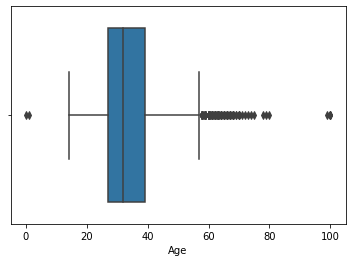

In [633]:
sns.boxplot(x=df_train['Age'])

<AxesSubplot:xlabel='CompensationScore'>

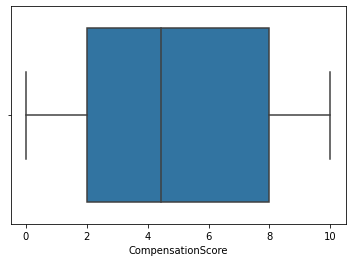

In [634]:
sns.boxplot(x=df_train['CompensationScore'])

In [635]:
threshold = 3
z = np.abs(stats.zscore(df_train['Age']))
arr = np.where(z > 3)
print(arr[0].size)
print(z)

58
[0.65769431 0.86126325 0.04698748 ... 0.45412537 0.55590984 0.05479699]


In [636]:
for i in range(arr[0].size):
    if not ( 5 < df_train['Age'][arr[0][i]] < 80 ):
        df_train.drop([arr[0][i]],inplace=True)

In [637]:
threshold = 3
z = np.abs(stats.zscore(df_test['Age']))
arr = np.where(z > 3)
print(arr[0].size)

11


In [638]:
for i in range(arr[0].size):
    if not ( 5 < df_test['Age'][arr[0][i]] < 80 ):
        df_test.drop([arr[0][i]],inplace=True)

In [639]:
df_train['Age'] = (df_train['Age'] - df_train['Age'].min())/(df_train['Age'].max()-df_train['Age'].min())
df_test['Age'] = (df_test['Age'] - df_test['Age'].min())/(df_test['Age'].max()-df_test['Age'].min())

In [640]:
df_train['CompensationScore'] = (df_train['CompensationScore'] - df_train['CompensationScore'].min())/(df_train['CompensationScore'].max()-df_train['CompensationScore'].min())
df_test['CompensationScore'] = (df_test['CompensationScore'] - df_test['CompensationScore'].min())/(df_test['CompensationScore'].max()-df_test['CompensationScore'].min())

In [641]:
scaler = StandardScaler()

In [642]:
df_train.iloc[:, 11:18]

,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube
0,Very useful,Very useful,Very useful,Very useful,Very useful,Very useful,Not Useful
1,Somewhat useful,Very useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful
2,Very useful,Very useful,Somewhat useful,Very useful,Very useful,Somewhat useful,Somewhat useful
3,Very useful,Very useful,Very useful,Very useful,Somewhat useful,Very useful,Somewhat useful
4,Very useful,Very useful,Somewhat useful,Very useful,Very useful,Very useful,Somewhat useful
...,...,...,...,...,...,...,...
5524,Very useful,Very useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful
5525,Somewhat useful,Somewhat useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful
5526,Somewhat useful,Very useful,Very useful,Very useful,Very useful,Very useful,Very useful
5527,Very useful,Very useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful


In [643]:
df1 = df_train.iloc[:, 11:18]
for column in df1:
    df_train[column] = LabelEncoder().fit_transform(df_train[column])
    df_train[column] = (df_train[column] - df_train[column].min())/(df_train[column].max()-df_train[column].min())
df_train.iloc[:,11:18].head()

,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.5,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,1.0,0.5,1.0,1.0,0.5,0.5
3,1.0,1.0,1.0,1.0,0.5,1.0,0.5
4,1.0,1.0,0.5,1.0,1.0,1.0,0.5


In [644]:
df1 = df_test.iloc[:, 11:18]
for column in df1:
    df_test[column] = LabelEncoder().fit_transform(df_test[column])
    df_test[column] = (df_test[column] - df_test[column].min())/(df_test[column].max()-df_test[column].min())
df_test.iloc[:,11:18].head()

,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube
0,1.0,0.5,1.0,1.0,0.5,1.0,0.5
1,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,0.5,0.5,1.0,1.0,1.0,1.0,0.5
4,1.0,1.0,1.0,1.0,0.5,0.5,1.0


In [645]:
df_train.iloc[:, 29:47]

,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess
0,Often,Most of the time,Often,Most of the time,Most of the time,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often
1,Sometimes,Often,Most of the time,Sometimes,Most of the time,Often,Often,Often,Often,Often,Rarely,Often,Often,Most of the time,Often,Often,Often,Often
2,Sometimes,Often,Most of the time,Often,Often,Often,Often,Often,Sometimes,Often,Sometimes,Often,Sometimes,Most of the time,Often,Sometimes,Often,Most of the time
3,Sometimes,Most of the time,Most of the time,Most of the time,Often,Often,Sometimes,Often,Often,Often,Sometimes,Often,Often,Most of the time,Often,Often,Rarely,Rarely
4,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Often,Sometimes,Most of the time,Sometimes,Often,Often,Often,Often,Most of the time,Often,Often,Often,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Sometimes,Often,Most of the time,Often,Often,Often,Often
5525,Most of the time,Most of the time,Most of the time,Most of the time,Often,Often,Often,Often,Often,Often,Often,Often,Often,Most of the time,Often,Often,Often,Sometimes
5526,Often,Most of the time,Most of the time,Most of the time,Often,Most of the time,Sometimes,Sometimes,Often,Often,Often,Sometimes,Often,Most of the time,Often,Sometimes,Often,Most of the time
5527,Sometimes,Most of the time,Often,Sometimes,Most of the time,Often,Sometimes,Often,Often,Sometimes,Sometimes,Often,Often,Sometimes,Often,Often,Often,Often


In [646]:
custom_mapping = {'Rarely': 0, 'Sometimes': 1, 'Often': 2, 'Most of the time': 3}
df2 = df_train.iloc[:, 29:47]
for column in df2:
    df_train[column] = df_train[column].map(custom_mapping)
    df_train[column] = (df_train[column] - df_train[column].min())/(df_train[column].max()-df_train[column].min())
    df_test[column] = df_test[column].map(custom_mapping)
    df_test[column] = (df_test[column] - df_test[column].min())/(df_test[column].max()-df_test[column].min())
print(df_test.iloc[:,29:47])

     WorkToolsFrequencyPython  WorkToolsFrequencyR  WorkToolsFrequencySQL  \
0                    0.666667             1.000000               0.666667   
1                    1.000000             1.000000               0.666667   
2                    1.000000             1.000000               1.000000   
3                    1.000000             1.000000               1.000000   
4                    1.000000             1.000000               1.000000   
..                        ...                  ...                    ...   
995                  0.000000             0.666667               1.000000   
996                  1.000000             1.000000               1.000000   
997                  0.333333             0.666667               0.333333   
998                  1.000000             1.000000               0.333333   
999                  0.333333             0.000000               1.000000   

     WorkMethodsFrequencyCross-Validation  \
0                             

In [647]:
custom_mapping2 = {'3 to 5 years':3, '1 to 2 years':2, '6 to 10 years':4,
       'More than 10 years':5, 'Less than a year':1,
       "I don't write code to analyze data":0}
df_train['Tenure'] = df_train['Tenure'].map(custom_mapping2)
df_train['Tenure'] = (df_train['Tenure'] - df_train['Tenure'].min())/(df_train['Tenure'].max()-df_train['Tenure'].min())
df_test['Tenure'] = df_test['Tenure'].map(custom_mapping2)
df_test['Tenure'] = (df_test['Tenure'] - df_test['Tenure'].min())/(df_test['Tenure'].max()-df_test['Tenure'].min())

In [648]:
c_m3 = {'51-75% of projects':4, '100% of projects':6, '10-25% of projects':2,
       '76-99% of projects':5, 'Less than 10% of projects':1,
       '26-50% of projects':3, 'None':0}
df_train['WorkDataVisualizations'] = df_train['WorkDataVisualizations'].map(c_m3)
df_train['WorkDataVisualizations'] = (df_train['WorkDataVisualizations'] - df_train['WorkDataVisualizations'].min())/(df_train['WorkDataVisualizations'].max()-df_train['WorkDataVisualizations'].min())
df_test['WorkDataVisualizations'] = df_test['WorkDataVisualizations'].map(c_m3)
df_test['WorkDataVisualizations'] = (df_test['WorkDataVisualizations'] - df_test['WorkDataVisualizations'].min())/(df_test['WorkDataVisualizations'].max()-df_test['WorkDataVisualizations'].min())

In [649]:
df_test.dtypes

ID                                          int64
GenderSelect                               object
Country                                    object
Age                                       float64
EmploymentStatus                           object
CurrentJobTitleSelect                      object
TitleFit                                   object
CurrentEmployerType                        object
MLToolNextYearSelect                       object
MLMethodNextYearSelect                     object
LanguageRecommendationSelect               object
LearningPlatformUsefulnessBlogs           float64
LearningPlatformUsefulnessKaggle          float64
LearningPlatformUsefulnessCourses         float64
LearningPlatformUsefulnessProjects        float64
LearningPlatformUsefulnessSO              float64
LearningPlatformUsefulnessTextbook        float64
LearningPlatformUsefulnessYouTube         float64
DataScienceIdentitySelect                  object
FormalEducation                            object


In [650]:
def intCount(columnN,name,df):
    myCount = []
    for i in columnN.values:
        myCount.append(i.count(',')+1)
    norm = [float(i)/max(myCount) for i in myCount]
    df.loc[:, name] = norm

In [651]:
intCount(df_train.WorkAlgorithmsSelect,'WorkAlgorithmsSelect',df_train)
intCount(df_test.WorkAlgorithmsSelect,'WorkAlgorithmsSelect',df_test)

In [652]:
intCount(df_train.PastJobTitlesSelect,'PastJobTitlesSelect',df_train)
intCount(df_test.PastJobTitlesSelect,'PastJobTitlesSelect',df_test)

In [653]:
intCount(df_train.MLTechniquesSelect,'MLTechniquesSelect',df_train)
intCount(df_test.MLTechniquesSelect,'MLTechniquesSelect',df_test)

In [654]:
intCount(df_train.MLSkillsSelect,'MLSkillsSelect',df_train)
intCount(df_test.MLSkillsSelect,'MLSkillsSelect',df_test)

In [655]:
intCount(df_train.CurrentEmployerType,'CurrentEmployerType',df_train)
intCount(df_test.CurrentEmployerType,'CurrentEmployerType',df_test)


In [658]:
df_test2 = df_test

In [659]:
for column in df_train.columns.values:
    if(df_train[column].dtype == 'O'):
        new_column = pd.get_dummies(df_train[column],prefix=column,columns=column)
        df_train = df_train.merge(new_column,left_index=True,right_index=True)
        df_train = df_train.drop(columns=column)  

In [660]:
df_test2.shape

(1000, 52)

In [661]:
for column in df_test2.columns.values:
    if(df_test2[column].dtype == 'O'):
        new_column = pd.get_dummies(df_test2[column],prefix=column,columns=column)
        df_test2 = df_test2.merge(new_column,left_index=True,right_index=True)
        df_test2 = df_test2.drop(columns=column)

In [662]:
for i in df_train.columns:
    if i not in df_test2.columns:
        if i != 'JobSatisfaction':
            df_train = df_train.drop(columns=i)

In [663]:
df_train.shape

(5521, 268)

In [664]:
for i in df_test2.columns:
    if i not in df_train.columns:
        df_test2 = df_test2.drop(columns=i) 

In [665]:
df_test2.shape

(1000, 267)

In [666]:
test_id = df_test2.ID
df_test2 = df_test2.drop(columns=['ID'])
df_test2.shape

(1000, 266)

In [668]:
z = df_train.ID
y = df_train.JobSatisfaction
X = df_train.drop(columns = ['JobSatisfaction','ID'])

In [669]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2, random_state=42)

In [670]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(df_test.shape)

(4416, 266)
(1105, 266)
(4416,)
(1105,)
(1000, 52)


In [671]:
# pca = PCA(.95)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_valid = pca.transform(X_valid)


In [698]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, y_pred))))

Root mean squared error:  2.0340999846258176


In [701]:
model = GradientBoostingRegressor(n_estimators=200,max_depth=2,loss='ls',random_state=42)
model.fit(X_train,y_train)
predicted = model.predict(X_valid)
print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

Root mean squared error:  1.9557328260718714


In [674]:
# # Get numerical feature importances
# importances = list(model.feature_importances_)# List of tuples with variable and importance
# feature_importances = [(df_train, round(importance, 2)) for df_train, importance in zip(list(df_train.columns), importances)]# Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
# # for pair in feature_importances:
# #     print(*pair)
# for pair in feature_importances:
#     if pair[0] != 'JobSatisfaction':
#         if pair[1] < 0.01:
#             df_train = df_train.drop(columns = pair[0])
#             df_test2 = df_test2.drop(columns= pair[0])
#     #print('Variable: {:20} Importance: {}'.format(*pair)) 

In [675]:
# regr = AdaBoostRegressor(random_state=0, n_estimators=100)
# regr.fit(X_train,y_train)
# predicted = regr.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

In [699]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth=12,min_samples_split=10) 
# scores = cross_val_score(regressor, X, y,scoring='neg_mean_squared_error', cv=5)
# print(np.sqrt(mean(scores)*-1))
regressor.fit(X_train, y_train)   
predicted = regressor.predict(X_valid)
print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

Root mean squared error:  2.0039677165715175


In [677]:
# ereg = VotingRegressor(estimators=[('gb', model), ('rf', regressor), ('gbdt', gbdt)])
# ereg.fit(X_train, y_train)
# predicted = ereg.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

In [678]:
# gbdt = HistGradientBoostingRegressor()
# gbdt.fit(X_train,y_train)
# predicted = gbdt.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

In [679]:
# predicted = model.predict(df_test2)
# print(predicted)


In [680]:
# my_submission = pd.DataFrame({'ID': df_test.ID, 'Prediction': predicted})
# my_submission.to_csv('submission.csv', index=False)



In [681]:
# kVals = [5,10,15,20]
# rmse_val = []
# for k in kVals:
#     knn = KNeighborsRegressor(n_neighbors=k)
#     # scores = cross_val_score(knn, X, y,scoring='neg_mean_squared_error', cv=5)
#     # print(np.sqrt(mean(scores)*-1))
#     knn.fit(X_train, y_train)
#     pred=knn.predict(X_valid)
#     error = np.sqrt(mean_squared_error(y_valid,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , k , 'is:', error)

In [682]:
# regressor = DecisionTreeRegressor(random_state=0,max_depth=3)
# #cross_val_score(regressor, X, y, cv=10)
# regressor.fit(X_train,y_train)

In [683]:
# pred = regressor.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, pred))))

In [684]:
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X_train,y_train)

In [685]:
# pred = regr.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, pred))))

In [686]:
# from sklearn.naive_bayes import CategoricalNB
# gnb = CategoricalNB()
# y_pred = gnb.fit(X_train, y_train).predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, y_pred))))

In [687]:
# from sklearn.naive_bayes import MultinomialNB

# model = MultinomialNB().fit(X_train, y_train)
# predicted = model.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

In [688]:
# from sklearn.naive_bayes import ComplementNB
# model = ComplementNB().fit(X_train, y_train)
# predicted = model.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

In [689]:
# from sklearn.naive_bayes import BernoulliNB
# model = BernoulliNB().fit(X_train, y_train)
# predicted = model.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, predicted))))

In [690]:
# regr = MLPRegressor(random_state=1, max_iter=30).fit(X_train, y_train)
# pred = regr.predict(X_valid)
# print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_valid, pred))))